<a href="https://colab.research.google.com/github/RoseMwangi98/HOUSE_PREDITION_WEEK_7/blob/main/WEEK_7_HOUSE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **DEFINING THE QUESTION**

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**METRIC FOR SUCCESS**

The metric for success for this analysis for the company would be to determine the exact features that influence the price of a house and to predict the sale prices.

**Experimental Design Taken**

This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data.
Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset,
Finally I will build several models:

Multiple Linear Regression
Quantile Regression
Ridge Regression
Lasso Regression
Elastic Net Regression
And evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem

**LOAD AND READ THE DATA**

Import the necessary libraries and use for analysis.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
df=pd.read_csv("house_data.csv")
df.head(3)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062

[3 rows x 20 columns]

In [ ]:
#check the data type in our data
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#check the number of columns and rows in the data
df.shape

(21613, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**DATA CLEANING**

In [ ]:
#check for missing values in our data
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#check for duplicate columns in our dataset
df.duplicated().sum()

3

In [ ]:
#drop the duplicates in our data
df.drop_duplicates(inplace=True )

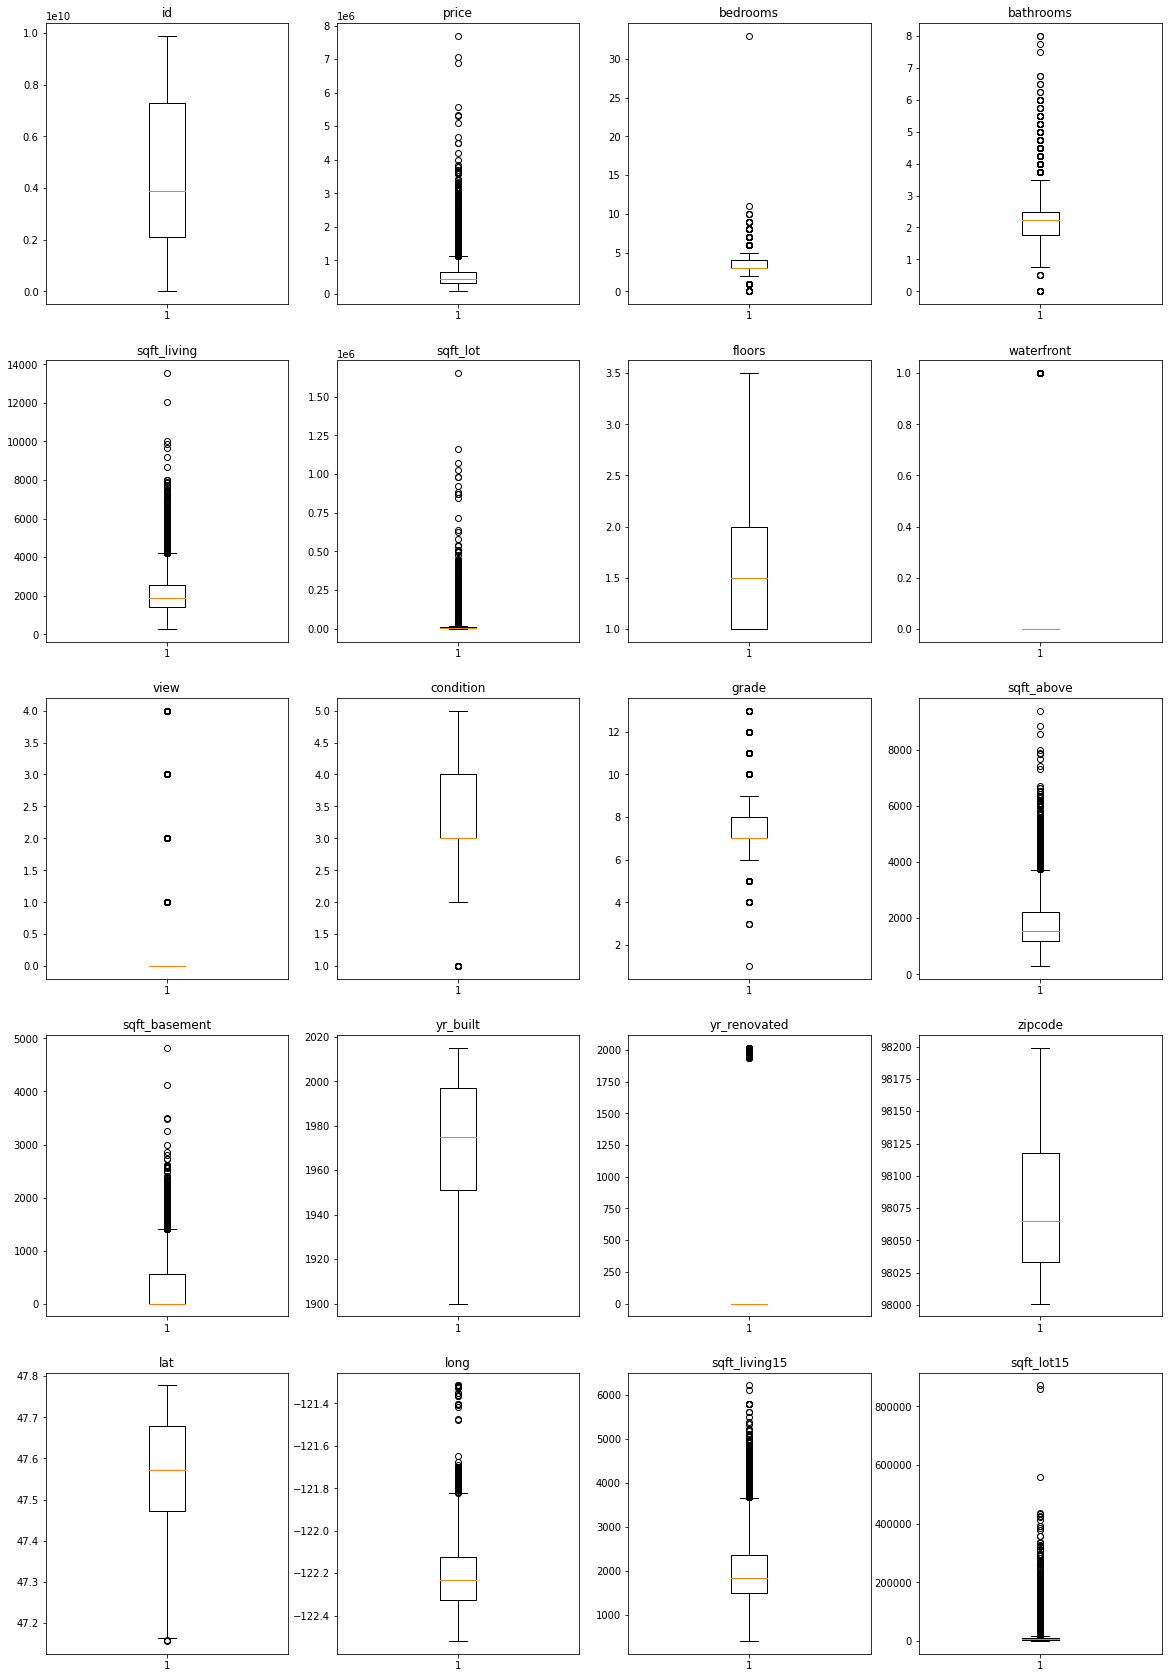

In [ ]:
#check for outliers in our dataset
# save the column names onto a dictionary
columns_dict = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

In [ ]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(df.shape)

(14935, 20)
(21610, 20)



**2.Exploratory Data Analysis**

**UNIVARIATE ANALYSIS**

In [13]:
df1.describe()

id         price  ...  sqft_living15    sqft_lot15
count  1.493500e+04  1.493500e+04  ...   14935.000000  14935.000000
mean   4.729214e+09  4.386582e+05  ...    1796.942819   6868.331034
std    2.851519e+09  1.805742e+05  ...     507.449152   2987.774641
min    2.800031e+06  8.200000e+04  ...     620.000000    651.000000
25%    2.321300e+09  3.000000e+05  ...    1430.000000   4800.000000
50%    4.037800e+09  4.050000e+05  ...    1710.000000   7172.000000
75%    7.453500e+09  5.475000e+05  ...    2090.500000   8649.500000
max    9.900000e+09  1.130000e+06  ...    3640.000000  17550.000000

[8 rows x 20 columns]

In [14]:
df['price'].describe()

count    2.161000e+04
mean     5.401789e+05
std      3.673876e+05
min      7.500000e+04
25%      3.216125e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [15]:
a=df1['price'].max()
b=df1['price'].min()
range = a-b
range


1048000.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

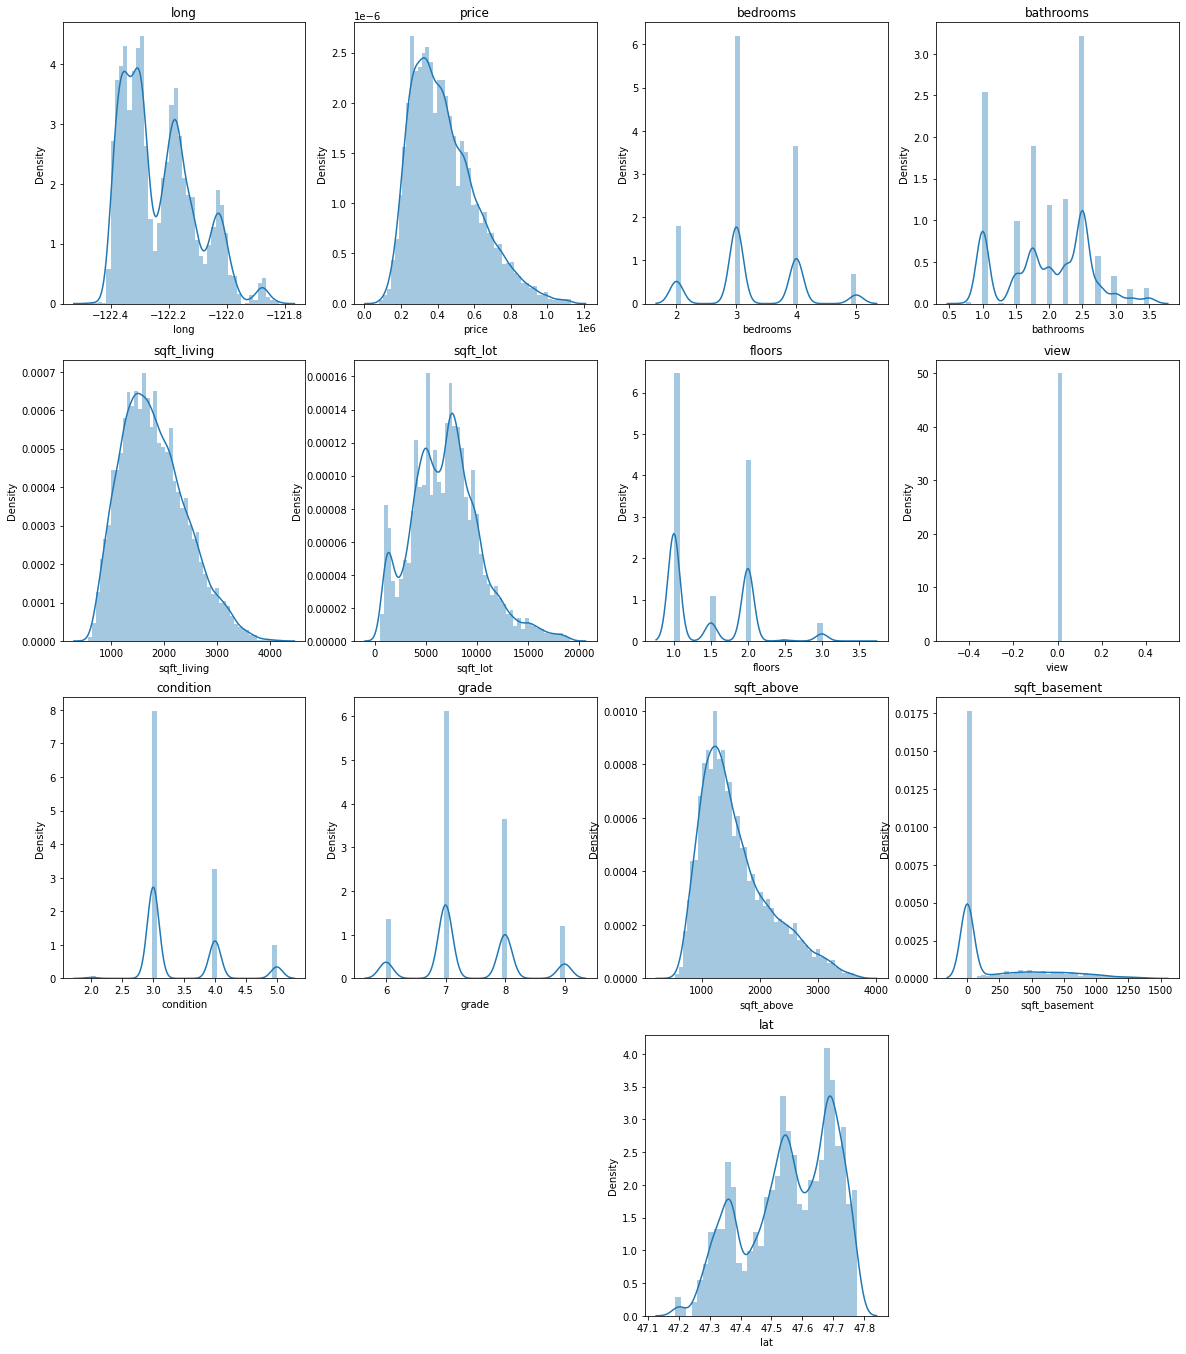

In [16]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'long': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12, 'lat': 15}
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df1[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

**BIVARIATE ANALYSIS**


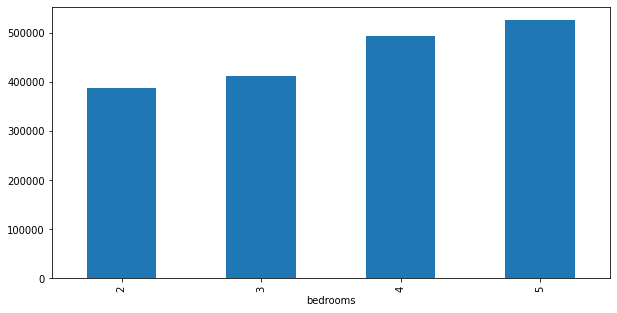

In [17]:
groups = df1.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.bar()

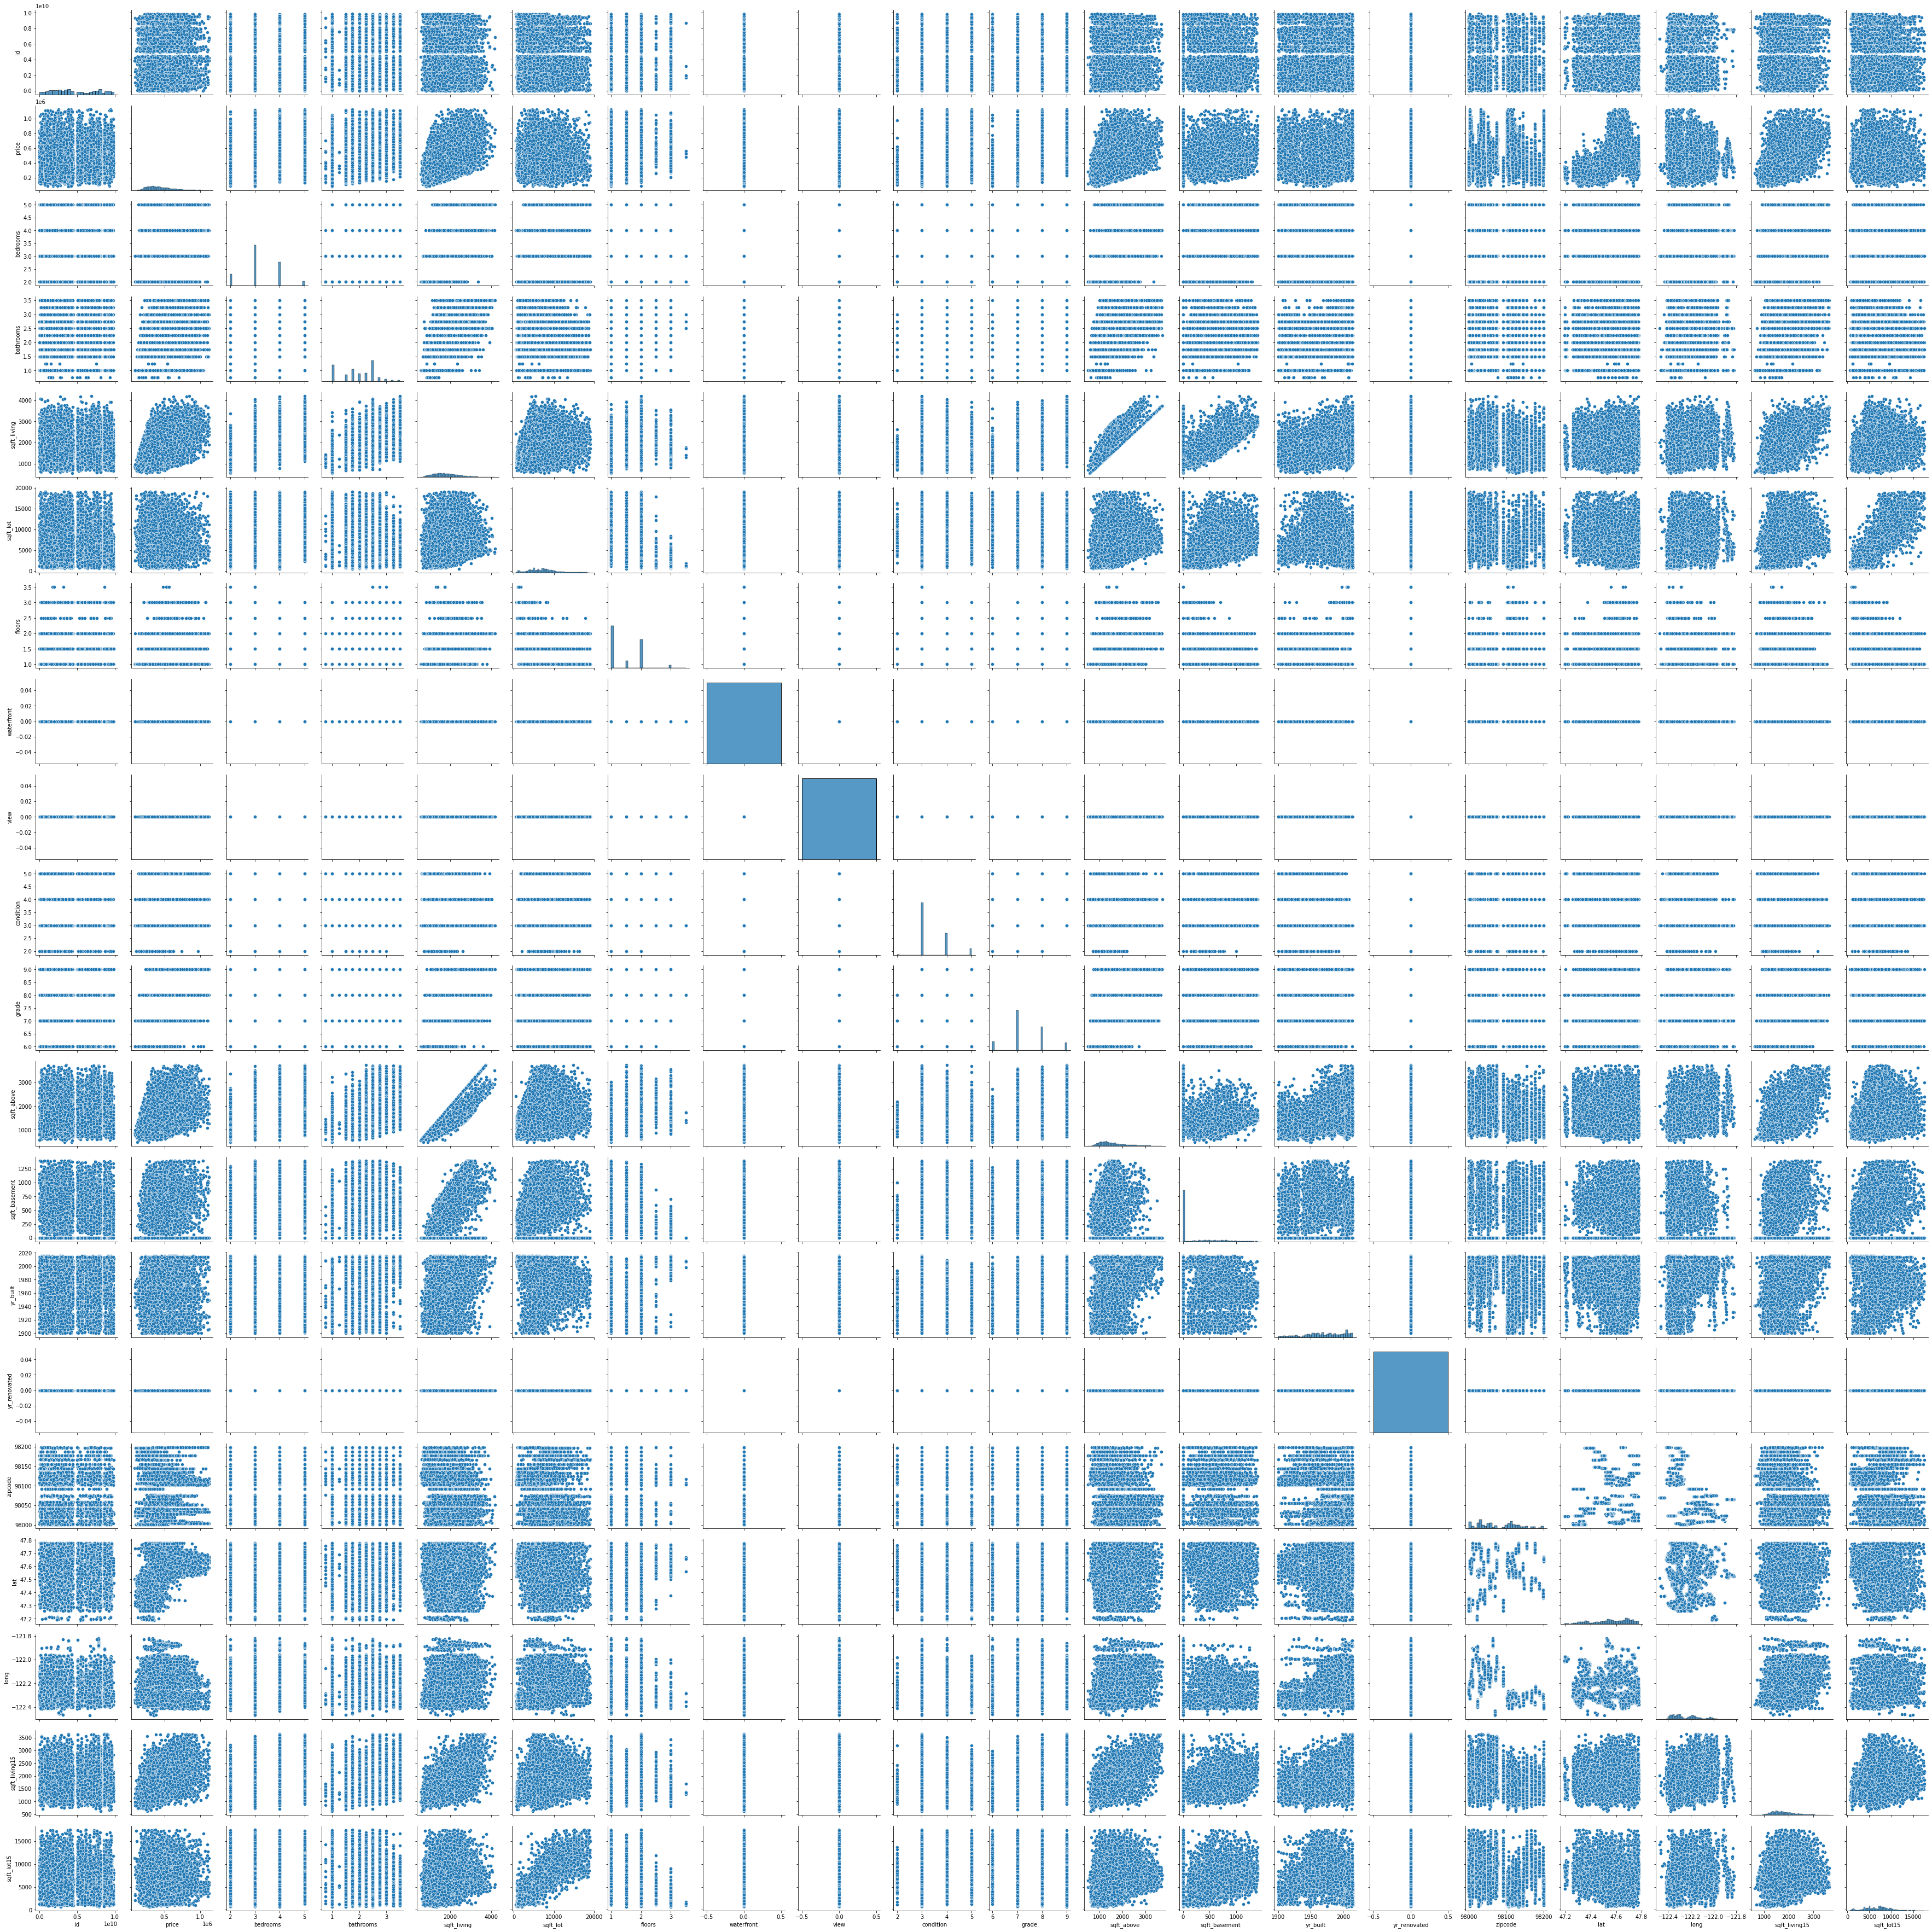

In [ ]:
sns.pairplot(df1)
plt.show()



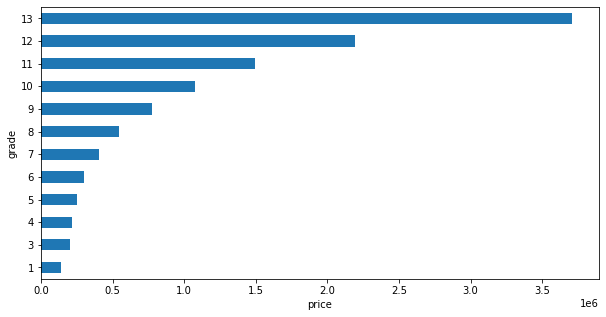

In [18]:
groups = df.groupby(['grade'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

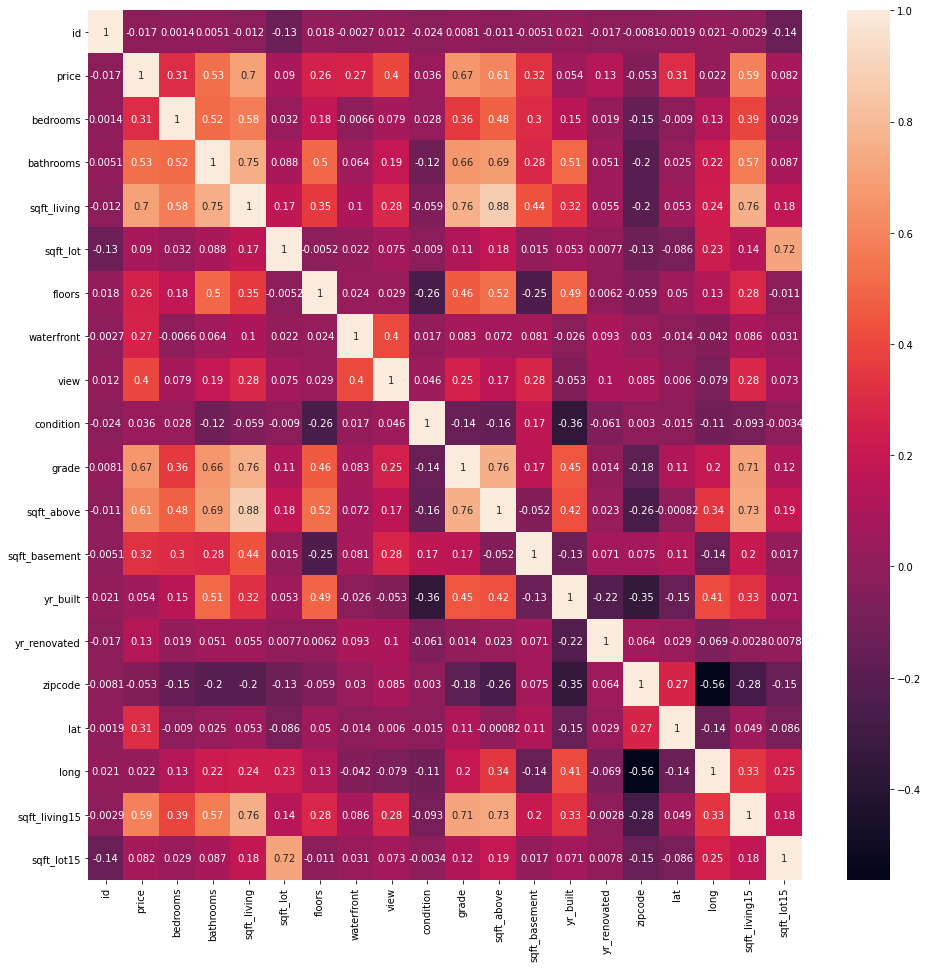

In [19]:
plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

In [20]:
df1.corr()

id     price  ...  sqft_living15  sqft_lot15
id             1.000000  0.040534  ...       0.054761   -0.053368
price          0.040534  1.000000  ...       0.448351   -0.095266
bedrooms       0.005133  0.240275  ...       0.413912    0.196550
bathrooms      0.043069  0.340515  ...       0.515260   -0.091595
sqft_living    0.045742  0.514739  ...       0.727338    0.150096
sqft_lot      -0.051644 -0.085271  ...       0.200472    0.882238
floors         0.030931  0.227673  ...       0.254963   -0.423792
waterfront          NaN       NaN  ...            NaN         NaN
view                NaN       NaN  ...            NaN         NaN
condition     -0.035253  0.085767  ...      -0.131223    0.152755
grade          0.057319  0.528074  ...       0.604311   -0.023451
sqft_above     0.052654  0.408119  ...       0.710284    0.101956
sqft_basement -0.010052  0.200784  ...       0.056287    0.087572
yr_built       0.039184 -0.013397  ...       0.362397   -0.085657
yr_renovated        NaN       NaN  ...            NaN         NaN
zipcode       -0.033789 -0.007886  ...      -0.331743   -0.257702
lat           -0.007053  0.490442  ...      -0.033947   -0.140226
long           0.073669  0.048738  ...       0.413788    0.220514
sqft_living15  0.054761  0.448351  ...       1.000000    0.215099
sqft_lot15    -0.053368 -0.095266  ...       0.215099    1.000000

[20 rows x 20 columns]

**FEATURE ENGINEERING**

In [21]:
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [22]:
df['house_size']= df['sqft_living']+df['sqft_above']+df['sqft_basement']

In [23]:
df['Years'] = 2020 - df['yr_built']

In [25]:
df.drop(['sqft_living','sqft_above','sqft_basement','yr_built','zipcode'],axis=1,inplace=True)

In [26]:
df.head()

id     price  bedrooms  ...  sqft_lot15  house_size  Years
0  7129300520  221900.0         3  ...        5650        2360     65
1  6414100192  538000.0         3  ...        7639        5140     69
2  5631500400  180000.0         2  ...        8062        1540     87
3  2487200875  604000.0         4  ...        5000        3920     55
4  1954400510  510000.0         3  ...        7503        3360     33

[5 rows x 17 columns]

**REGRESSION ANALYSIS**


**MULTIPLE LINEAR REGRESSION**


In [27]:

from sklearn import preprocessing
names = df.columns
d = preprocessing.normalize(df)
df2 = pd.DataFrame(d, columns=names)
df2.head()

id     price      bedrooms  ...    sqft_lot15    house_size         Years
0  1.0  0.000031  4.207986e-10  ...  7.925041e-07  3.310283e-07  9.117304e-09
1  1.0  0.000084  4.677195e-10  ...  1.190970e-06  8.013595e-07  1.075755e-08
2  1.0  0.000032  3.551451e-10  ...  1.431590e-06  2.734618e-07  1.544881e-08
3  1.0  0.000243  1.608234e-09  ...  2.010292e-06  1.576069e-06  2.211321e-08
4  1.0  0.000261  1.534998e-09  ...  3.839029e-06  1.719197e-06  1.688497e-08

[5 rows x 17 columns]

In [28]:
X = df2.drop(['price','long','lat','grade'],axis=1)
y = df2.price


In [29]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
# Scale the data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [31]:
# Fitting a Multiple Linear Regression Model
regression=LinearRegression()
regression = regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)

In [32]:
df3= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

Actual  Predicted
9789   0.000236   0.000215
10279  0.000062   0.000061
21569  0.000038   0.000063
20057  0.000067   0.000119
21201  0.000437   0.000296
...         ...        ...
17760  0.000039   0.000043
13210  0.000253   0.000386
8107   0.000100   0.000200
19726  0.000177   0.000175
16121  0.000133   0.000087

[4322 rows x 2 columns]

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.00013894256725268547
Mean Squared Error: 6.250710839409599e-07
Root Mean Squared Error: 0.0007906143711955657


In [34]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': -1.8419336988865186e-05,
 'bathrooms': 0.0020818019551544845,
 'bedrooms': -0.009525930270912574,
 'condition': 0.00274225375478058,
 'floors': 0.00012179649081639271,
 'house_size': 0.008437379085102831,
 'id': -0.0018965217541542304,
 'sqft_living15': 0.00010412019227118603,
 'sqft_lot': 0.0007696074178815994,
 'sqft_lot15': -0.0006160766931515033,
 'view': 0.00016279742783504797,
 'waterfront': -1.7244183118055234e-05,
 'yr_renovated': 0.00030867491321068767}

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9222666196406875

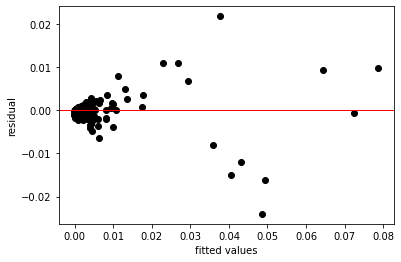

In [36]:
residuals =np.subtract(y_pred,y_test)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [37]:
# check for multicollinearity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result,p_value)
print(critical_value)

5319.3671048502865 0.0
inf


**QUANTILE REGRESSION**

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [67]:
# We will use the python package statsmodels for Quantile Regression

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 1.8e+05 and our slope or the coefficient for our x is  8.5ee+04. 
# These are the parameters for the 0.5th quantile of our y.


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.04633
Model:                       QuantReg   Bandwidth:                   4.016e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21610
Time:                        07:53:15   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.396     25.294      0.000    1.66e+05    1.94e+05
bedrooms      8.5e+04   2035.111     41.767      0.000     8.1e+04     8.9e+04


In [66]:
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ sqft_living', df1)
res = mod.fit(q=.75)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 2.109e+05 and our slope or the coefficient for our x is  180.6977. 
# These are the parameters for the 0.75th quantile of our y.


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.1785
Model:                       QuantReg   Bandwidth:                   2.821e+04
Method:                 Least Squares   Sparsity:                    4.971e+05
Date:                Fri, 16 Apr 2021   No. Observations:                14935
Time:                        07:53:01   Df Residuals:                    14933
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.109e+05   5582.053     37.786      0.000       2e+05    2.22e+05
sqft_living   180.6977      2.919     61.897      0.000     174.975     186.420

The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical proble

In [64]:
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ house_size', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 1.13e+04 and our slope or the coefficient for our x is  108.3700.
# These are the parameters for the 0.5th quantile of our y.


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2479
Model:                       QuantReg   Bandwidth:                   3.151e+04
Method:                 Least Squares   Sparsity:                    4.835e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21610
Time:                        07:50:09   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.27e+04   4071.040     12.944      0.000    4.47e+04    6.07e+04
house_size   108.3700      0.895    121.048      0.000     106.615     110.125

The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


**LASSO REGRESSION**

In [39]:
#Fitting the model
lasso =linear_model.Lasso(alpha=0.001) 
lasso = lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test) 
print("lasso MSE:", mean_squared_error(y_test,y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

lasso MSE: 3.0754302239679544e-06
Root Mean Squared Error: 0.0017536904584241639


In [40]:
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.0,
 'bathrooms': 0.0,
 'bedrooms': 0.0,
 'condition': 0.0025485143029430096,
 'floors': 0.0,
 'house_size': 0.0,
 'id': -0.0014666270069665357,
 'sqft_living15': 0.0009715572421986038,
 'sqft_lot': 0.0,
 'sqft_lot15': 0.0,
 'view': 0.0,
 'waterfront': 0.0,
 'yr_renovated': 0.0}

In [41]:
from sklearn.metrics import r2_score
lasso = lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.617541758833293

In [42]:
parameters = {'alpha': np.concatenate((np.arange(0.0001,0.1,0.1), np.arange(2, 5, 0.5), np.arange(5, 1000, 5)))}
lasso = linear_model.Lasso(normalize=True ,max_iter=1000000) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2',cv=20) 
gridlasso.fit(X_train, y_train) 
 
print("lasso best parameters:", gridlasso.best_params_)

lasso best parameters: {'alpha': 0.0001}


In [43]:
lasso = linear_model.Lasso(normalize=True,alpha =0.0001)
lasso.fit(X_train, y_train)
predicted = lasso.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df2.describe()

Actual     Predicted
count  4322.000000  4.322000e+03
mean      0.000451  4.892103e-04
std       0.002836  2.396364e-17
min       0.000014  4.892103e-04
25%       0.000062  4.892103e-04
50%       0.000114  4.892103e-04
75%       0.000243  4.892103e-04
max       0.073103  4.892103e-04

**RIDGE REGRESSION**

In [44]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,10)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
search.best_params_

In [45]:
ridge = Ridge(normalize=True,alpha=1e-05)
ridge = ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('Mean squared error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean squared error 6.246717964332201e-07
Root Mean Squared Error: 0.0007903618136228623


In [46]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': -1.876312931357682e-05,
 'bathrooms': 0.0020780586888838907,
 'bedrooms': -0.009512301726002297,
 'condition': 0.002742890276049598,
 'floors': 0.00011932216689870866,
 'house_size': 0.008422074128775017,
 'id': -0.0018951127789053174,
 'sqft_living15': 0.00011407197629498936,
 'sqft_lot': 0.0007663936632567503,
 'sqft_lot15': -0.0006146355231232948,
 'view': 0.0001631355077009185,
 'waterfront': -1.732383174704538e-05,
 'yr_renovated': 0.0003085421202299308}

In [47]:
from sklearn.metrics import r2_score
ridge = ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.9223162747415381

**ELASTIC NET REFRESSION**

In [48]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [49]:
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.2}

In [50]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.2)
elastic = elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
print('Mean Squared Error :' ,mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error : 2.530905454544871e-06
Root Mean Squared Error: 0.0015908819737946846


In [51]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.000824817682633192,
 'bathrooms': 0.00020653362037914097,
 'bedrooms': 0.0,
 'condition': 0.0010753948481511946,
 'floors': 0.0,
 'house_size': 0.0008005820749879373,
 'id': -0.0014422132809683865,
 'sqft_living15': 0.0009404987286715525,
 'sqft_lot': 5.6055499301840316e-05,
 'sqft_lot15': 0.00040214642251375086,
 'view': 0.00011810478299857213,
 'waterfront': 0.0,
 'yr_renovated': 2.779544658245913e-05}

In [52]:
from sklearn.metrics import r2_score
y_pred=elastic.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.6852584587480652

**CONCLUSION**

From the five regression that have been conducted,we have found that the RMSE are as following

1.Multiple Linear Regression-  Root Mean Squared Error: 0.0007906143711955657

2.Quantile Regression-  Root Mean Squared Error:0.02035 

3.Ridge Regression-Root Mean Squared Error: 0.0007903618136228623

4.Lasso Regression-Root Mean Squared Error: 0.001753690458424163

5.Elastic net Regression-Root Mean Squared Error: 0.0015908819737946846

From our analysis,the we determined that the Multiple Linear Regression is the best for the orediction of the prices since it has a low RMSE and the results are almost accurate.